\newpage

For all the questions, use Python 3.11.5 and virtual environment. Then, install the required libraries for text mining and Shiny visualization. 

In [366]:

import pdfplumber
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))

# word_tokenize uses punkt tokenizer model

#3 Use `pdfplumber.open()` to open the PDF.
    
pdf = pdfplumber.open('paper.pdf')


[nltk_data] Downloading package punkt to /Users/michael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/michael/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [383]:

#4 Extract the text from pages 2 to 5

pages = pdf.pages[1:5]
# Extract text from each page and append it
pdf_text = ''
for page in pages:
    pdf_text += page.extract_text() 



In [384]:
# 5 Combine the text from these pages into a single string.

combined_text = '\n'.join(pdf_text)


In [369]:

# (6) Split the string by lines using `\n`.

lines = combined_text.split("\n")
print(lines[:10])  # Print first 10 lines
df.shape

['H', 'a', 'r', 'v', 'a', 'r', 'd', ' ', 'D', 'a']


(1312, 2)

In [370]:


# (7) Create a pandas DataFrame named `outline` with a column labeled `line` containing the split lines.

combined_text = '\n'.join(pdf_text)
outline = pd.DataFrame({'line': combined_text.split('\n')})

In [371]:
#8 tokenize each line
outline['word'] = outline['line'].apply(word_tokenize)
# convert each word to a row
outline = outline.explode('word')

outline.shape
outline.head(20)


,line,word
0,H,H
1,a,a
2,r,r
3,v,v
4,a,a
5,r,r
6,d,d
7,,NaN
8,D,D
9,a,a


In [372]:


# (9) Convert each word into a separate row in the DataFrame.

df = df.explode("words", ignore_index=True)
print(df.head())  # Check after exploding

                                                line    words
0  Harvard Data Science Review • Issue 5.2, Sprin...  harvard
1  Harvard Data Science Review • Issue 5.2, Sprin...     data
2  Harvard Data Science Review • Issue 5.2, Sprin...  science
3  Harvard Data Science Review • Issue 5.2, Sprin...   review
4  Harvard Data Science Review • Issue 5.2, Sprin...    issue


In [373]:

# (10) Convert all words to lowercase.
outline['word'] = outline['word'].str.lower()

In [374]:
# (11) Remove stop words.
english_stopwords = set(stopwords.words('english'))
outline = outline[~outline['word'].isin(english_stopwords)]

In [379]:
# Drop rows with NaN values in the 'word' column
outline = outline.dropna(subset=['word'])

outline = outline[~outline['word'].str.contains(r'[\[\].,:()\•\]%-]', regex=True)]
outline.shape

outline = outline[~outline['word'].str.contains(r'\d', regex=True)]

outline = outline[~outline['word'].str.contains(r'[,.•‘”“:’;\(\)\[\]]', regex=True)]

In [382]:
# (12) Remove unsuitable words
outline= outline.dropna(subset=["word"])
outline["words"] = outline["word"].astype(str)


In [333]:


# (13) Create a term–frequency DataFrame.



freq = outline['word'].value_counts().reset_index()
freq.columns = ['word', 'n']
print(freq.head(5))
print(freq.shape)

          word   n
0         data  44
1      science  38
2        human  19
3         loop  18
4  engineering  13
(766, 2)


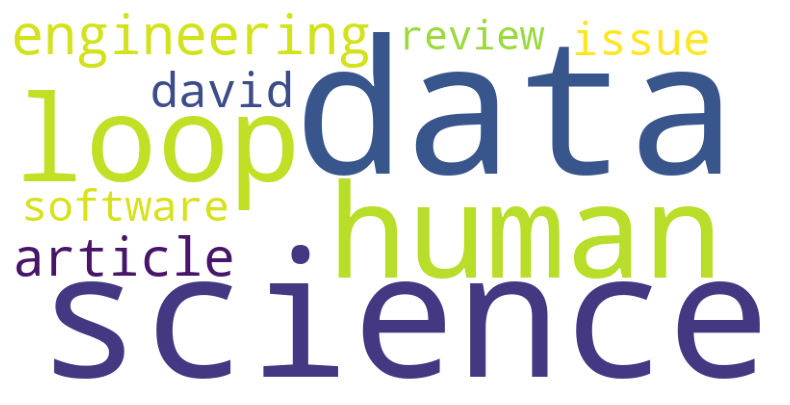

In [361]:
#14 Get the top 10 most frequent words
freq_top10 = freq.head(10)

# combine words and frequency into a dictionary
word_freq = dict(
    zip(
        freq_top10['word'], 
        freq_top10['n']
        )
    )

# word cloud theme
wordcloud = WordCloud(width=800, height=400, background_color='white')
# word cloud
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

15 
The word cloud visualization highlights the most frequently occurring words in the text, like "data," "science," being the most frequent as the character size is biggest. I can assume that text is more related to data science topic, human research, or technology research. Other words such as "engineering," "article," and "software" indicates the technical and analytical aspects of the document.

The word "David" appear in the word cloud, which seem like a person's name, it might indicate references to specific people rather than thematic content. We should consider filtering non-informative words in the future, so we can improve the clarity of the analysis.

\newpage

##2 The pre-processed dataset is now available for analysis and can be accessed at: 

[\color{blue} https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv\color{black}](https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv).

**You will use this dataset for Question 2.**

In [125]:
##1 Read the pre-processed data from the provided link.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load the dataset
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv"
df = pd.read_csv(url)
print(df.head())  # Preview dataset

   Year Facility_ID Province_Territory           CO2          CH4        N2O  \
0  2022      G12721             Quebec  2.473800e+02   956.162100   0.001900   
1  2022      G10001             Quebec  3.887707e+04     0.760073   0.675020   
2  2022      G10003            Alberta  3.368673e+05   482.571900   8.587500   
3  2022      G10004            Ontario  9.980300e+02     0.243572   0.025105   
4  2022      G10006            Alberta  1.101755e+06  4295.113188  16.554313   

   SF6  HFC  PFC  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0  


In [126]:
#2 Ensure that the year variable is in the correct format. 
# If not, convert it to the date-time format and extract the year. 
# Replace the original 'Year' variable with the extracted year.

df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
print(df['Year'].dtype)  



int32


In [127]:
##3 Compute the number of unique facilities per Province/Territory in 2004
missing_territories = df[df['Year'] == 2004].groupby(['Year', 'Province_Territory']).agg(
    facilities=('Facility_ID', 'nunique')
).reset_index()

# Get the full list of territories 
all_territories = df['Province_Territory'].unique()

# territories that appear in 2004
territories_2004 = missing_territories['Province_Territory'].unique()

# missing territories
missing_list = set(all_territories) - set(territories_2004)

print("Missing territories in 2004:", missing_list)

Missing territories in 2004: {'Yukon', nan, 'Nunavut'}


In [90]:
##4 Find the earliest and latest year emissions were recorded.
earliest_year = df['Year'].min()
latest_year = df['Year'].max()
print(f"Emissions data is available from {earliest_year} to {latest_year}.")

##5 Group the data by `Year` and `Province_Territory` and 
# sum the emissions of CO2, CH4, and N2O for each province
emission_summary = df.groupby(['Year', 'Province_Territory']).agg(
    CO2=('CO2', 'sum'),
    CH4=('CH4', 'sum'),
    N2O=('N2O', 'sum')
).reset_index()

print(emission_summary.head()) 

Emissions data is available from 2004 to 2022.
   Year         Province_Territory           CO2            CH4          N2O
0  2004                    Alberta  1.027572e+08  135337.195168  5120.460777
1  2004           British Columbia  1.263764e+07   34007.739560   673.717199
2  2004                   Manitoba  1.859467e+06   25508.017000   210.645008
3  2004              New Brunswick  1.286296e+07    1426.663022   270.524004
4  2004  Newfoundland and Labrador  5.233507e+06    5123.829998    88.760300


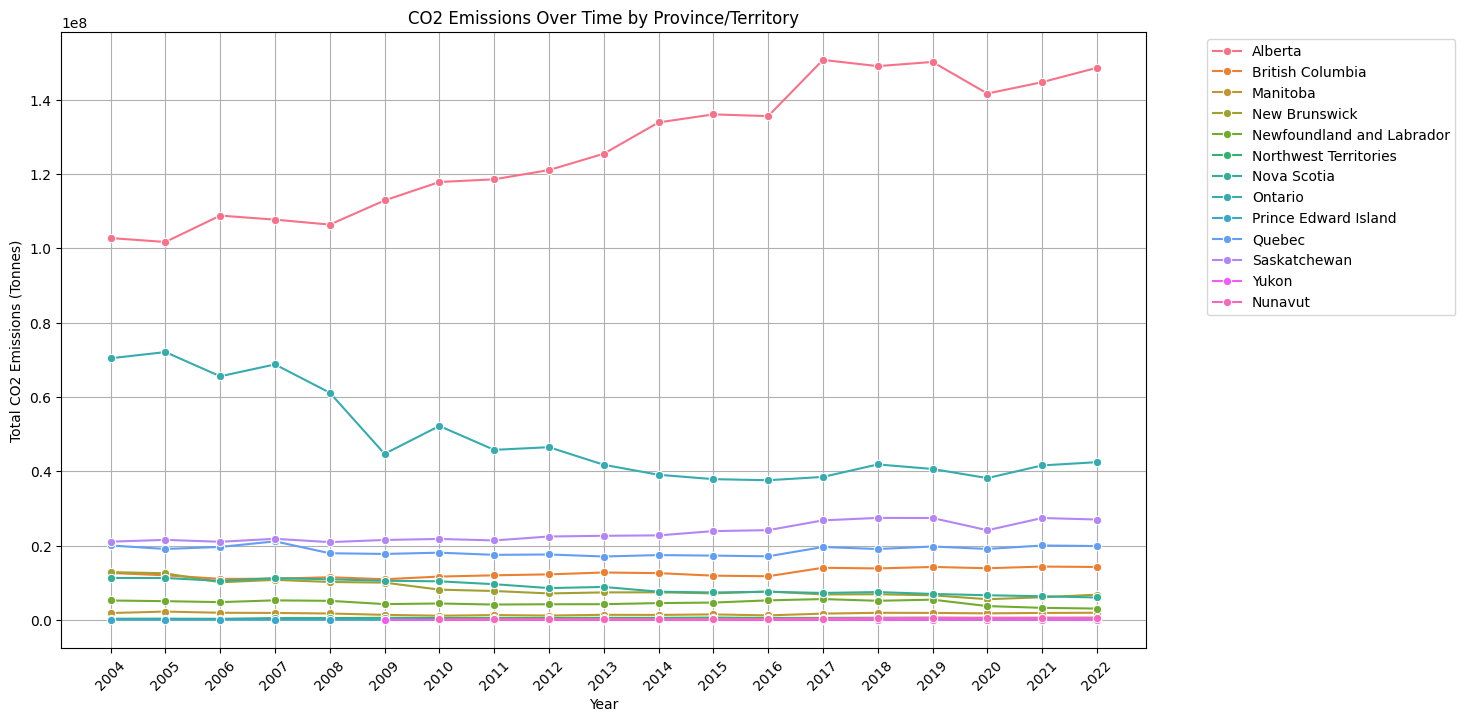

In [128]:
##6 Plot the CO2 changes over the years for each province and territory, 
# using colored lines to differentiate between them.

plt.figure(figsize=(14, 8))
sns.lineplot(data=emission_summary, x='Year', y='CO2', hue='Province_Territory', marker='o')
plt.title('CO2 Emissions Over Time by Province/Territory')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Tonnes)')
######
plt.xticks(ticks=np.arange(emission_summary['Year'].min(), 
                                   emission_summary['Year'].max() + 1, 1), 
                                   rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##7
## Some regions like Ontario show a decline trend, while Alberta's emissions have grown. 
# Other provinces and territories have remained relatively stable on CO₂ emissions. 
# The changes might depends on each provinces' energy policies, industrial activity and 
# population.


In [36]:
## (8) Develop a Shiny app that allows the user to input a start year (from 2004 to 2022),
# an end year (from 2004 to 2022), and select a gas type (CO2, CH4, N2O).

import shiny
from shiny import ui, render
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv"
df = pd.read_csv(url)

# Convert 'Year' column to date-time format and extract the year
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Define the UI for the Shiny app
app_ui = ui.page_fluid(
    ui.input_select(
        id='emissiontype',
        label='Choose emission type',
        choices=['CO2', 'CH4', 'N2O'],
        selected='CO2'
    ),
    ui.input_select(
        "start_year", 
        "Start Year", 
        [str(year) for year in range(2004, 2023)]  
    ),
    ui.input_select(
        "end_year", 
        "End Year", 
        [str(year) for year in range(2004, 2023)]  
    ),
    ui.output_plot('myplot')  
)

# Define the server function for Shiny app
def server(input, output, session):
    @output
    @render.plot
    def myplot():
        # Filter data based on selected start and end year
        start_year = int(input.start_year())
        end_year = int(input.end_year())
        df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

        # Select the emission type based on user input
        emission_type = input.emissiontype()

        # Create a plot to visualize the emission trends
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_filtered, x='Year', y=emission_type, hue='Province_Territory', marker='o')
        plt.title(f'{emission_type} Emissions Over Time by Province/Territory')
        plt.xlabel('Year')
        plt.ylabel(f'Total {emission_type} Emissions (Tonnes)')
        plt.legend(title='Province/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(ticks=np.arange(df_filtered['Year'].min(), df_filtered['Year'].max() + 1, 1), rotation=45)
        plt.grid(True)
        
        return plt.gcf()  


app = shiny.App(app_ui, server)

In [32]:
import shiny



9 the link to my app is [https://rongxin.shinyapps.io/myapp2/](https://rongxin.shinyapps.io/myapp2/)

\newpage

## References
